<h1><b><u> Data analysis of T1 and T2 for a given concentration

<h5>

----

In nuclear magnetic resonance (NMR) and magnetic resonance imaging (MRI), the relaxation times T1 and T2 describe how nuclear spins return to equilibrium after being disturbed by a radiofrequency pulse.

----

<u>T1 (Spin–lattice relaxation time):</u>  This is the time constant that characterizes how quickly the net magnetization vector recovers along the direction of the external magnetic field (longitudinal relaxation). It reflects energy exchange between the spins and their surroundings (the “lattice”). T1 depends strongly on molecular motion and the local environment, often increasing with lower paramagnetic ion concentration.

<u> T2 (Spin–spin relaxation time):</u> This is the time constant for the loss of phase coherence among spins in the plane perpendicular to the external magnetic field (transverse relaxation). It arises from interactions between neighboring spins and leads to signal decay. T2 is generally shorter than T1 and is highly sensitive to local magnetic field inhomogeneities.

---- 

Together, T1 and T2 provide complementary information about molecular dynamics and the local chemical environment, and analyzing their variation with concentration reveals how paramagnetic ions influence relaxation processes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib as mpl

In [2]:
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

#Increase display resolution
mpl.rcParams['figure.dpi'] = 200

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
#prevents lines from being jagged
mpl.rcParams['lines.antialiased'] = True

#
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5

#I have no idea what this does
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1

mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
#defines the colors to cycle through when line colors are not specifically defined
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'DejaVu Serif'
mpl.rcParams['font.sans-serif'] = 'DejaVu Sans'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['axes.labelpad'] = 9.0

# Title
mpl.rcParams['axes.titlepad'] = 10.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 22

#default in mpl v2.0 is 'out'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['ytick.minor.visible'] = True

#Error bar plots
#default in mpl v2.0 is no caps on error bars
mpl.rcParams['errorbar.capsize'] = 3

# Legend
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation

# Figure size
mpl.rcParams['figure.figsize'] = 12, 8

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1
mpl.rcParams['savefig.dpi'] = 200 #higher-res than default 100 dpi

<h2><u><b> Data analysis for T1 data

<h5>
For a given concentration of paramagnetic ions, the <b>spin–lattice relaxation time (T1)</b> can be determined from the dependence of the integrated FFT-FID signal on the recovery delay. After perturbing the nuclear spins with an inversion or saturation pulse, the magnetization along the longitudinal axis gradually returns to equilibrium through energy exchange with the surrounding lattice.  

The recovery follows an exponential law:  

$
M_z(\tau) = M_0 \left(1 - e^{-\tau/T_1}\right),
$

where $ M_z(\tau) $ is the integrated signal at time $ \tau $, and $ M_0 $ is the equilibrium magnetization.  

By recording the integrated FFT-FID signal for a series of $ \tau $ values and fitting the data to this expression, the T1 relaxation time can be extracted for the given concentration.  


<h5> a. Importing data

In [3]:
# Load T1 data
t1_data = pd.read_csv("./data/T1Sample1.dat", sep="\t")

# Convert 'Tau' column to numeric, removing 'ms' and handling errors
t1_data['Tau'] = pd.to_numeric(
    t1_data['Tau'].astype(str).str.replace('ms', ''), errors='coerce'
)

# Drop rows with NaN values in 'Tau' or 'Signal'
t1_data = t1_data.dropna()

t1_data = t1_data.sort_values(by = 'Tau')
t1_data.head()

,Tau,Integrated FID FFT Signal
1,1.00,18114561.80
9,1.01,19233746.86
16,1.02,18086308.03
10,1.03,16208186.89
15,1.04,14649580.26


<h5> b. Plotting raw data

Text(0.5, 0, 'Tau (ms)')

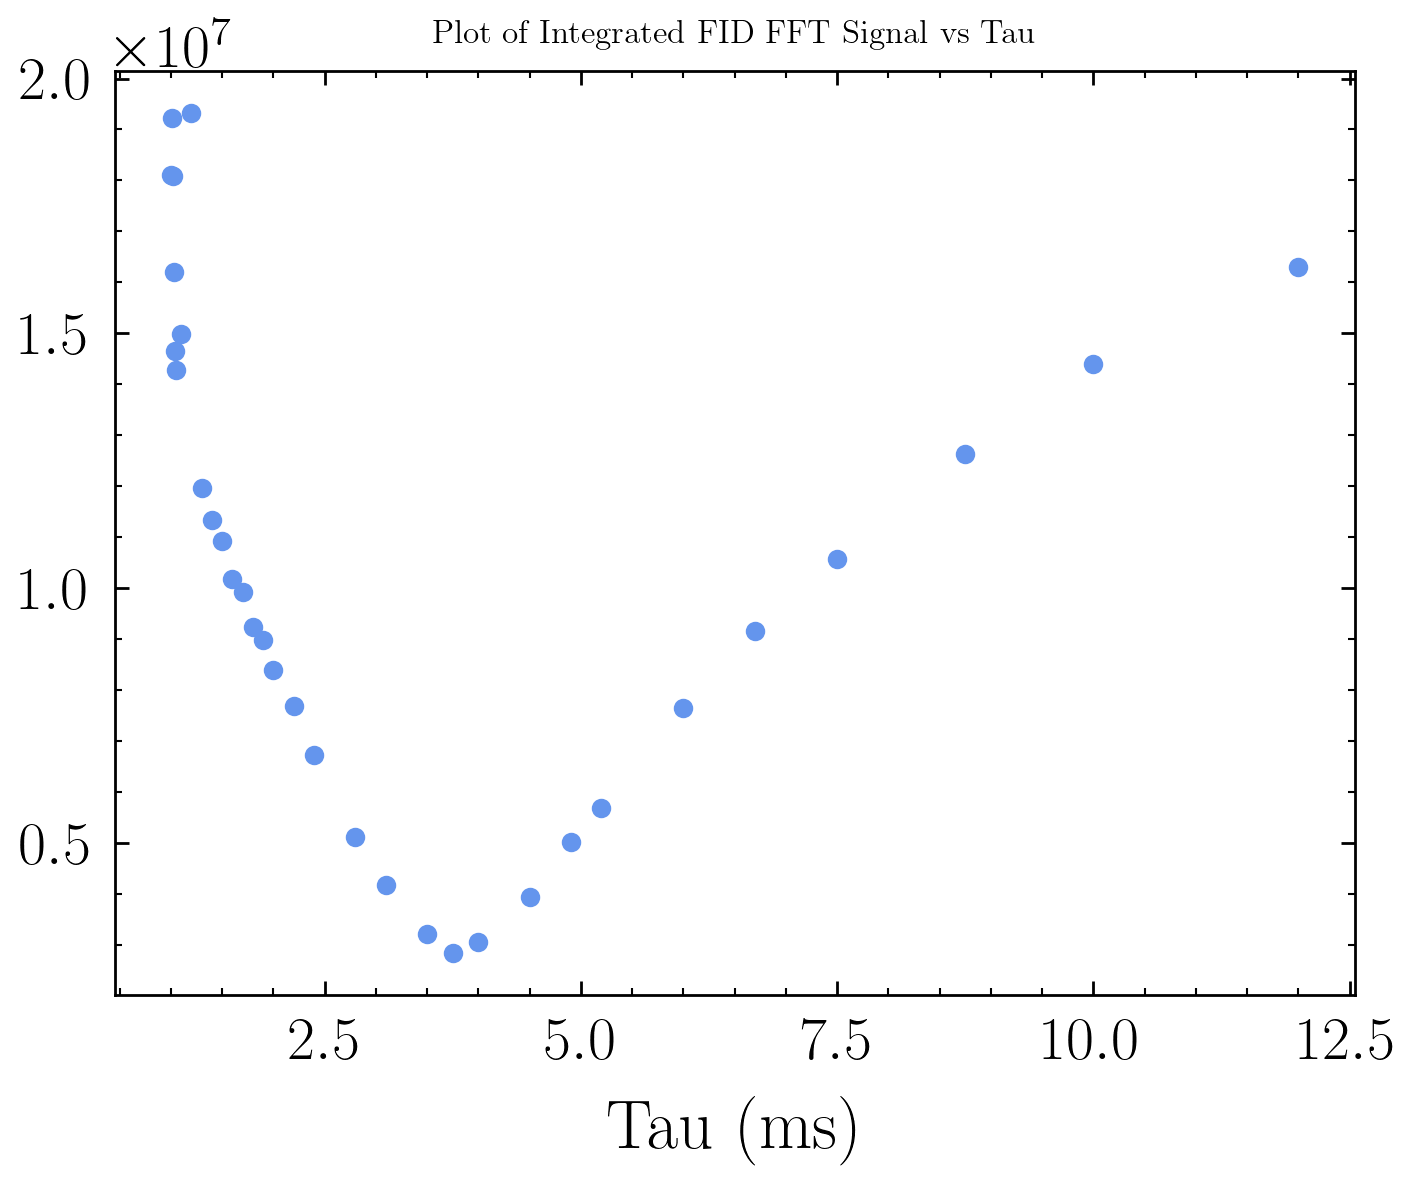

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(t1_data['Tau'], t1_data['Integrated FID FFT Signal'])
plt.title("Plot of Integrated FID FFT Signal vs Tau")
plt.xlabel("Tau (ms)")

<h5>

c. Cleaning data and plotting 

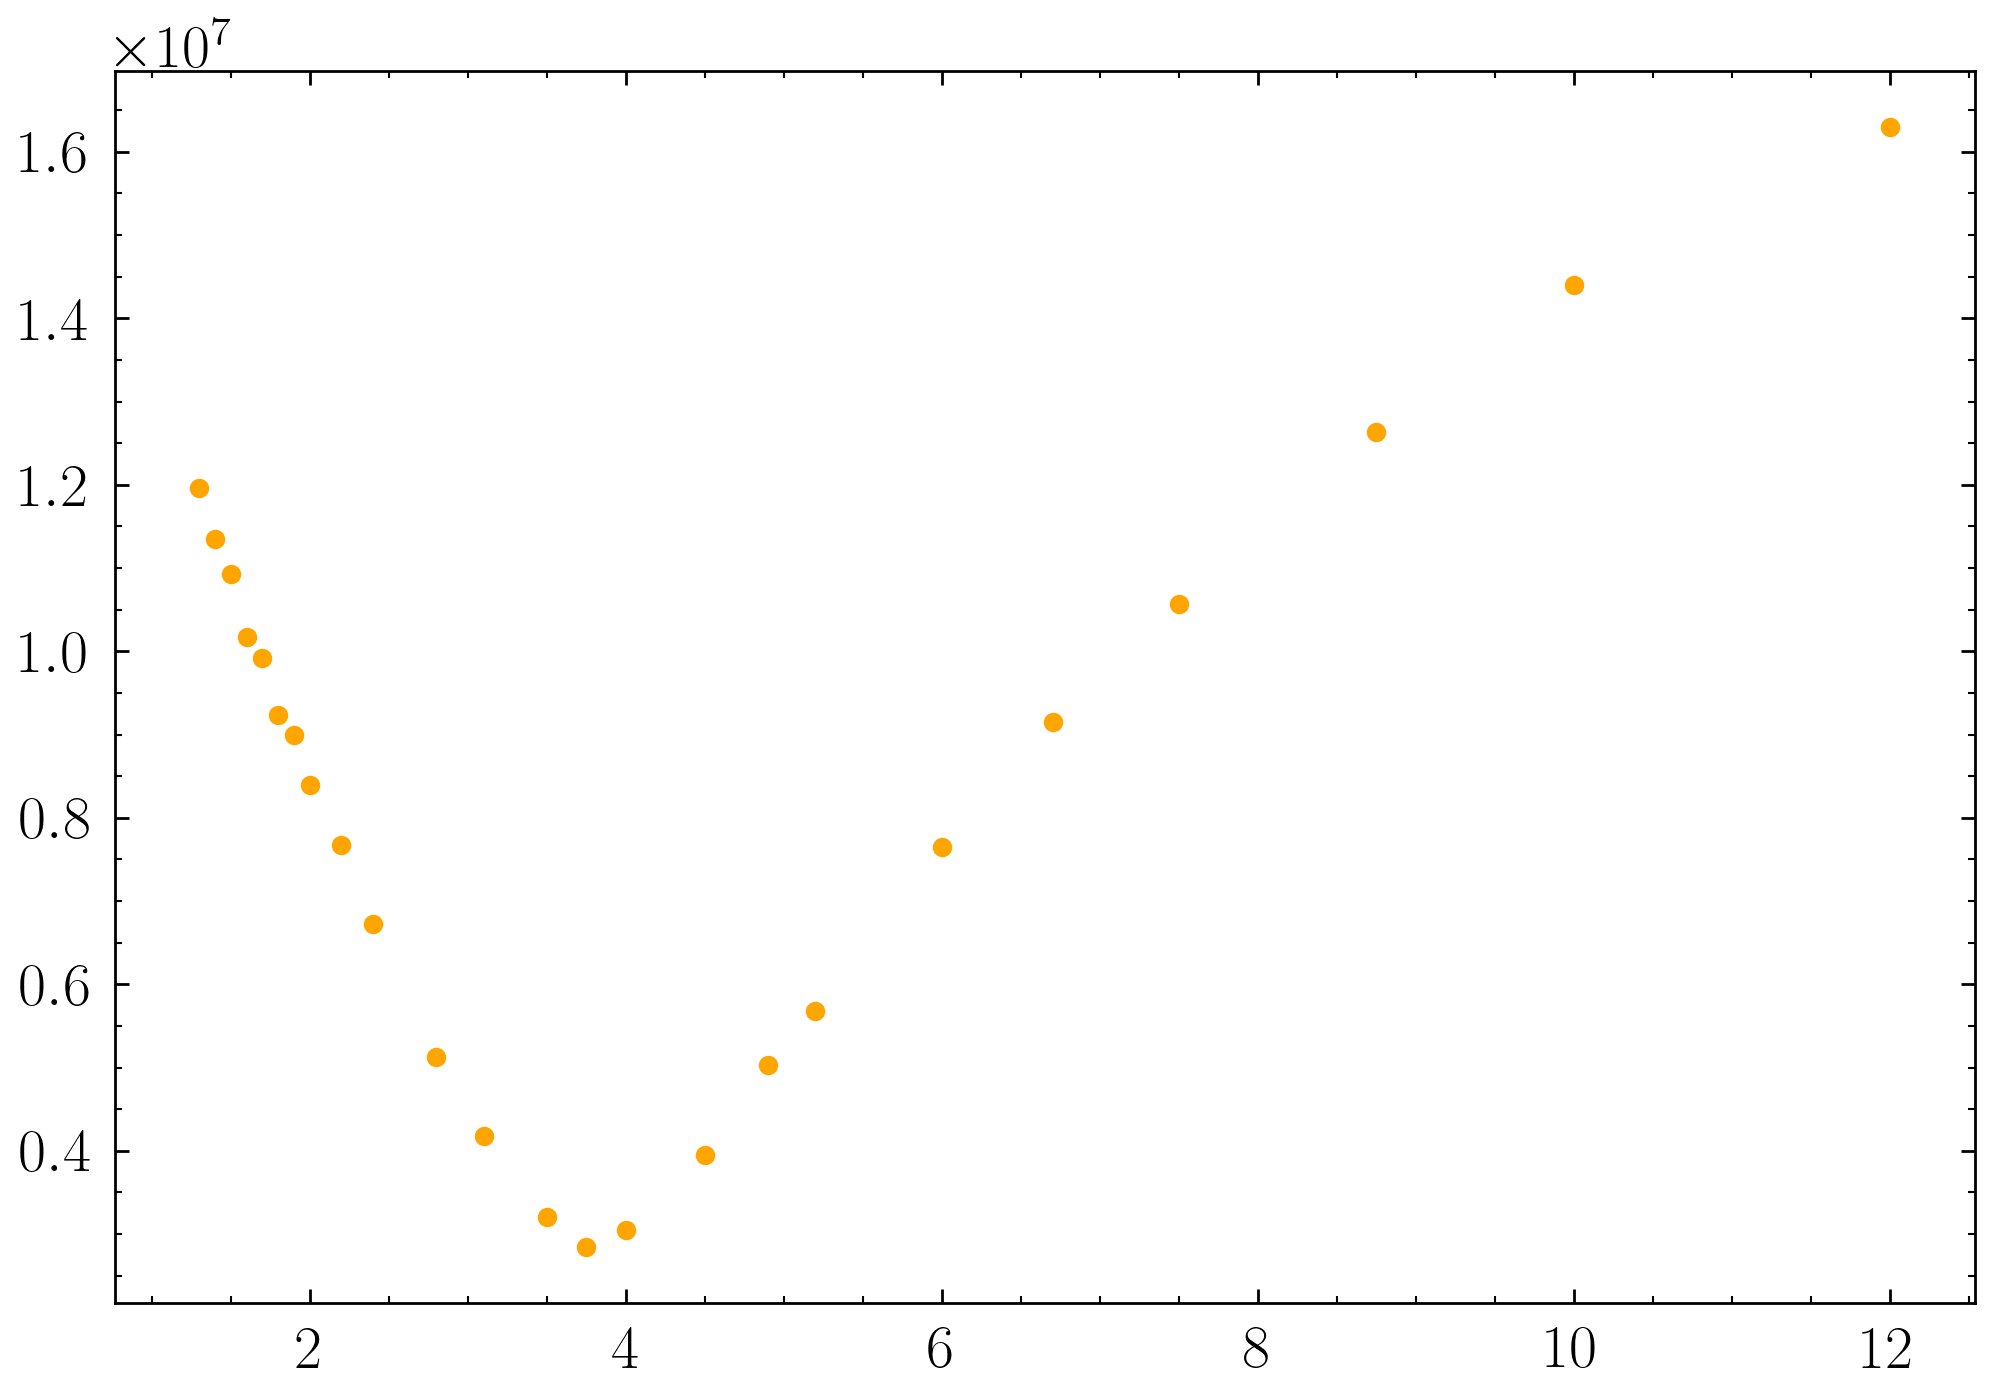

In [5]:
cleaned_t1_data = t1_data[8:]
plt.scatter(cleaned_t1_data['Tau'], cleaned_t1_data['Integrated FID FFT Signal'], color='orange')


<h5>

d. Fitting data to the theoretical curve

Initial guesses: M_0=1.35e+07, T_1=2.0, b=2.85e+06
Fitted parameters (uncleaned): M_0=2.15e+07, T_1=5.60, b=1.04e+06
Fitted parameters (cleaned): M_0=1.75e+07, T_1=5.42, b=1.94e+06


Text(0.5, 1.0, 'T1 Fit for Sample 1')

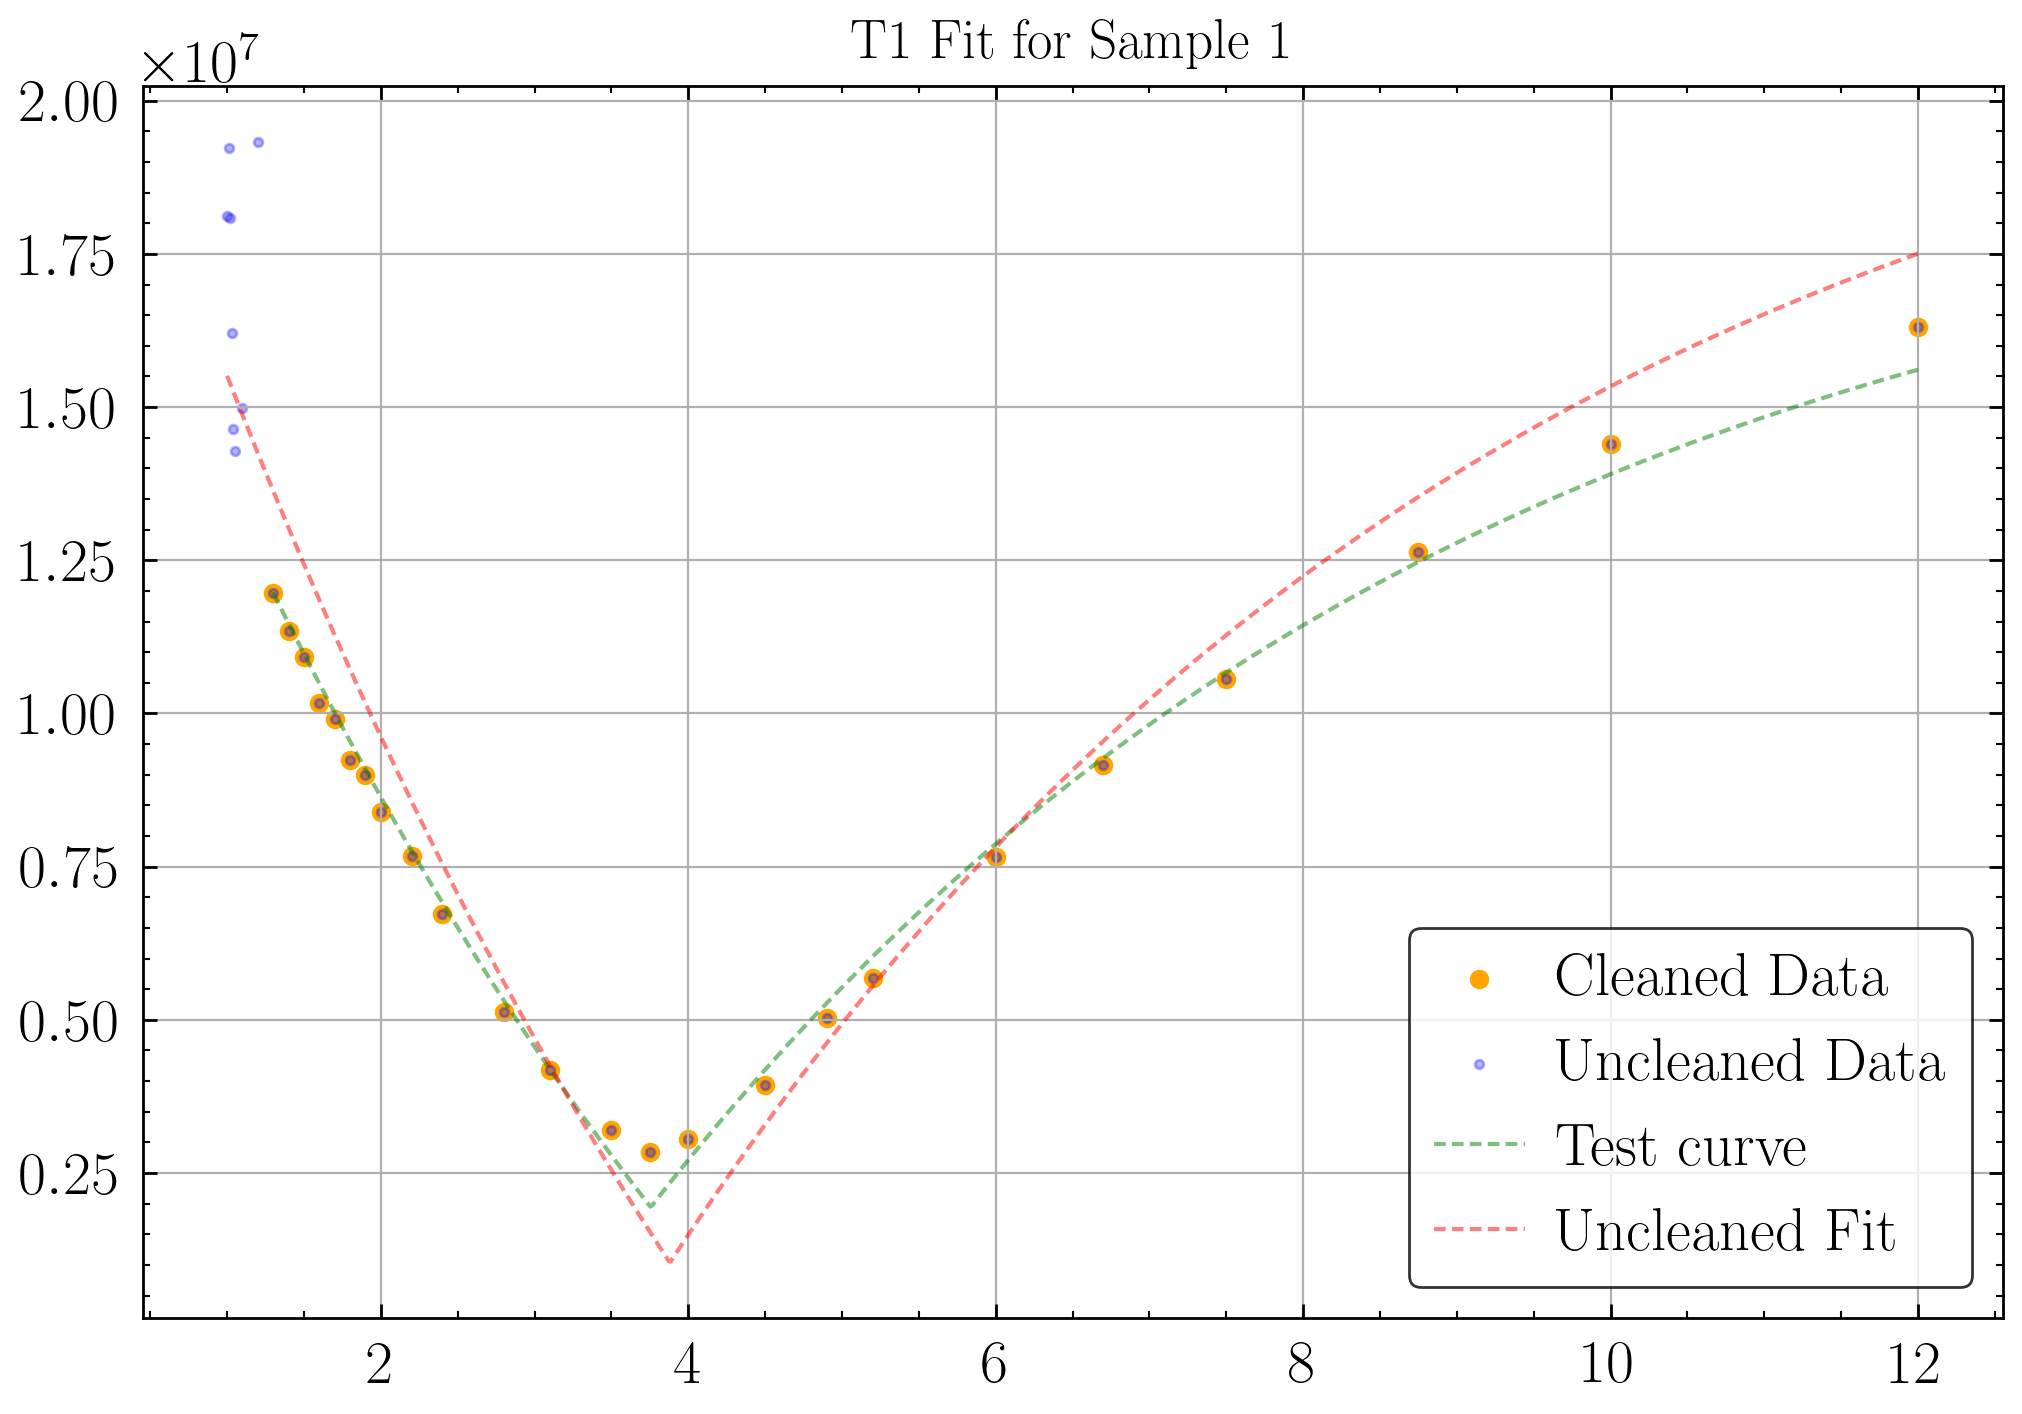

In [6]:
def fit_function_t1(t, M_0, T_1, b):
    return np.abs(M_0 * (1 - 2 * np.exp(-t / T_1))) + b


y_data = cleaned_t1_data['Integrated FID FFT Signal']
t_data = cleaned_t1_data['Tau']

M_0_guess = np.max(y_data) - np.min(y_data) 
T_1_guess = 2.0  
b_guess = np.min(y_data)

print(f"Initial guesses: M_0={M_0_guess:.2e}, T_1={T_1_guess}, b={b_guess:.2e}")

popt_t1, pcov_t1 = curve_fit(
    fit_function_t1,
    t_data,
    y_data,
    p0=[M_0_guess, T_1_guess, b_guess],
    bounds=(
        [0, 0.1, 0],  [np.inf, 10.0, np.inf]
    ),
    maxfev=10000
)


popt_uncleaned_t1, pcov_uncleaned_t1 = curve_fit(
    fit_function_t1,
    t1_data['Tau'],
    t1_data['Integrated FID FFT Signal'],
    p0=[M_0_guess, T_1_guess, b_guess],
    bounds=(
        [0, 0.1, 0],  [np.inf, 10.0, np.inf]
    ),
    maxfev=100000
)


print(f"Fitted parameters (uncleaned): M_0={popt_uncleaned_t1[0]:.2e}, T_1={popt_uncleaned_t1[1]:.2f}, b={popt_uncleaned_t1[2]:.2e}")

print(f"Fitted parameters (cleaned): M_0={popt_t1[0]:.2e}, T_1={popt_t1[1]:.2f}, b={popt_t1[2]:.2e}")

ts = np.linspace(min(t_data), max(t_data), 1000)

test_curve = fit_function_t1(ts, *popt_t1)
plt.scatter(t_data, y_data, label='Cleaned Data', color='orange')

plt.scatter(t1_data['Tau'], t1_data['Integrated FID FFT Signal'], label='Uncleaned Data', color='blue', alpha=0.3, s = 10)
plt.plot(ts, test_curve, 'g--', alpha=0.5, label='Test curve')


ts_uncleaned = np.linspace(min(t1_data['Tau']), max(t1_data['Tau']), 1000)
test_curve_uncleaned = fit_function_t1(ts_uncleaned, *popt_uncleaned_t1)
plt.plot(ts_uncleaned, test_curve_uncleaned, 'r--', alpha=0.5, label='Uncleaned Fit')
plt.legend()
plt.grid(True)

plt.title("T1 Fit for Sample 1", fontsize=20)

<h2><b><u> Data analysis for T2 data

<h5>
For a given concentration of paramagnetic ions, the <b>spin–spin relaxation time (T2)</b> can be determined from the decay of the integrated FFT-FID signal as a function of the echo delay. After excitation, the transverse magnetization loses phase coherence due to interactions between spins and local field inhomogeneities, leading to signal decay.  

The decay follows an exponential law:  

$
M_{xy}(\tau) = M_0 e^{-\tau/T_2},
$

where $ M_{xy}(\tau) $ is the integrated signal at time $ \tau $, and $ M_0 $ is the initial transverse magnetization.  

By recording the integrated FFT-FID signal for a series of $ \tau $ values and fitting the data to this expression, the T2 relaxation time can be extracted for the given concentration.  


<h5> a. Extracting data and plotting 

In [7]:
t2_data = pd.read_csv("./data/T2Sample1.dat", sep="\t")
t2_data['Time'] = pd.to_numeric(
    t2_data['Time'].astype(str).str.replace('ms', ''), errors='coerce'
)
t2_data = t2_data.dropna()
t2_data = t2_data.sort_values(by = 'Time')

Text(0.5, 1.0, '$T_2$ Data for Sample 1')

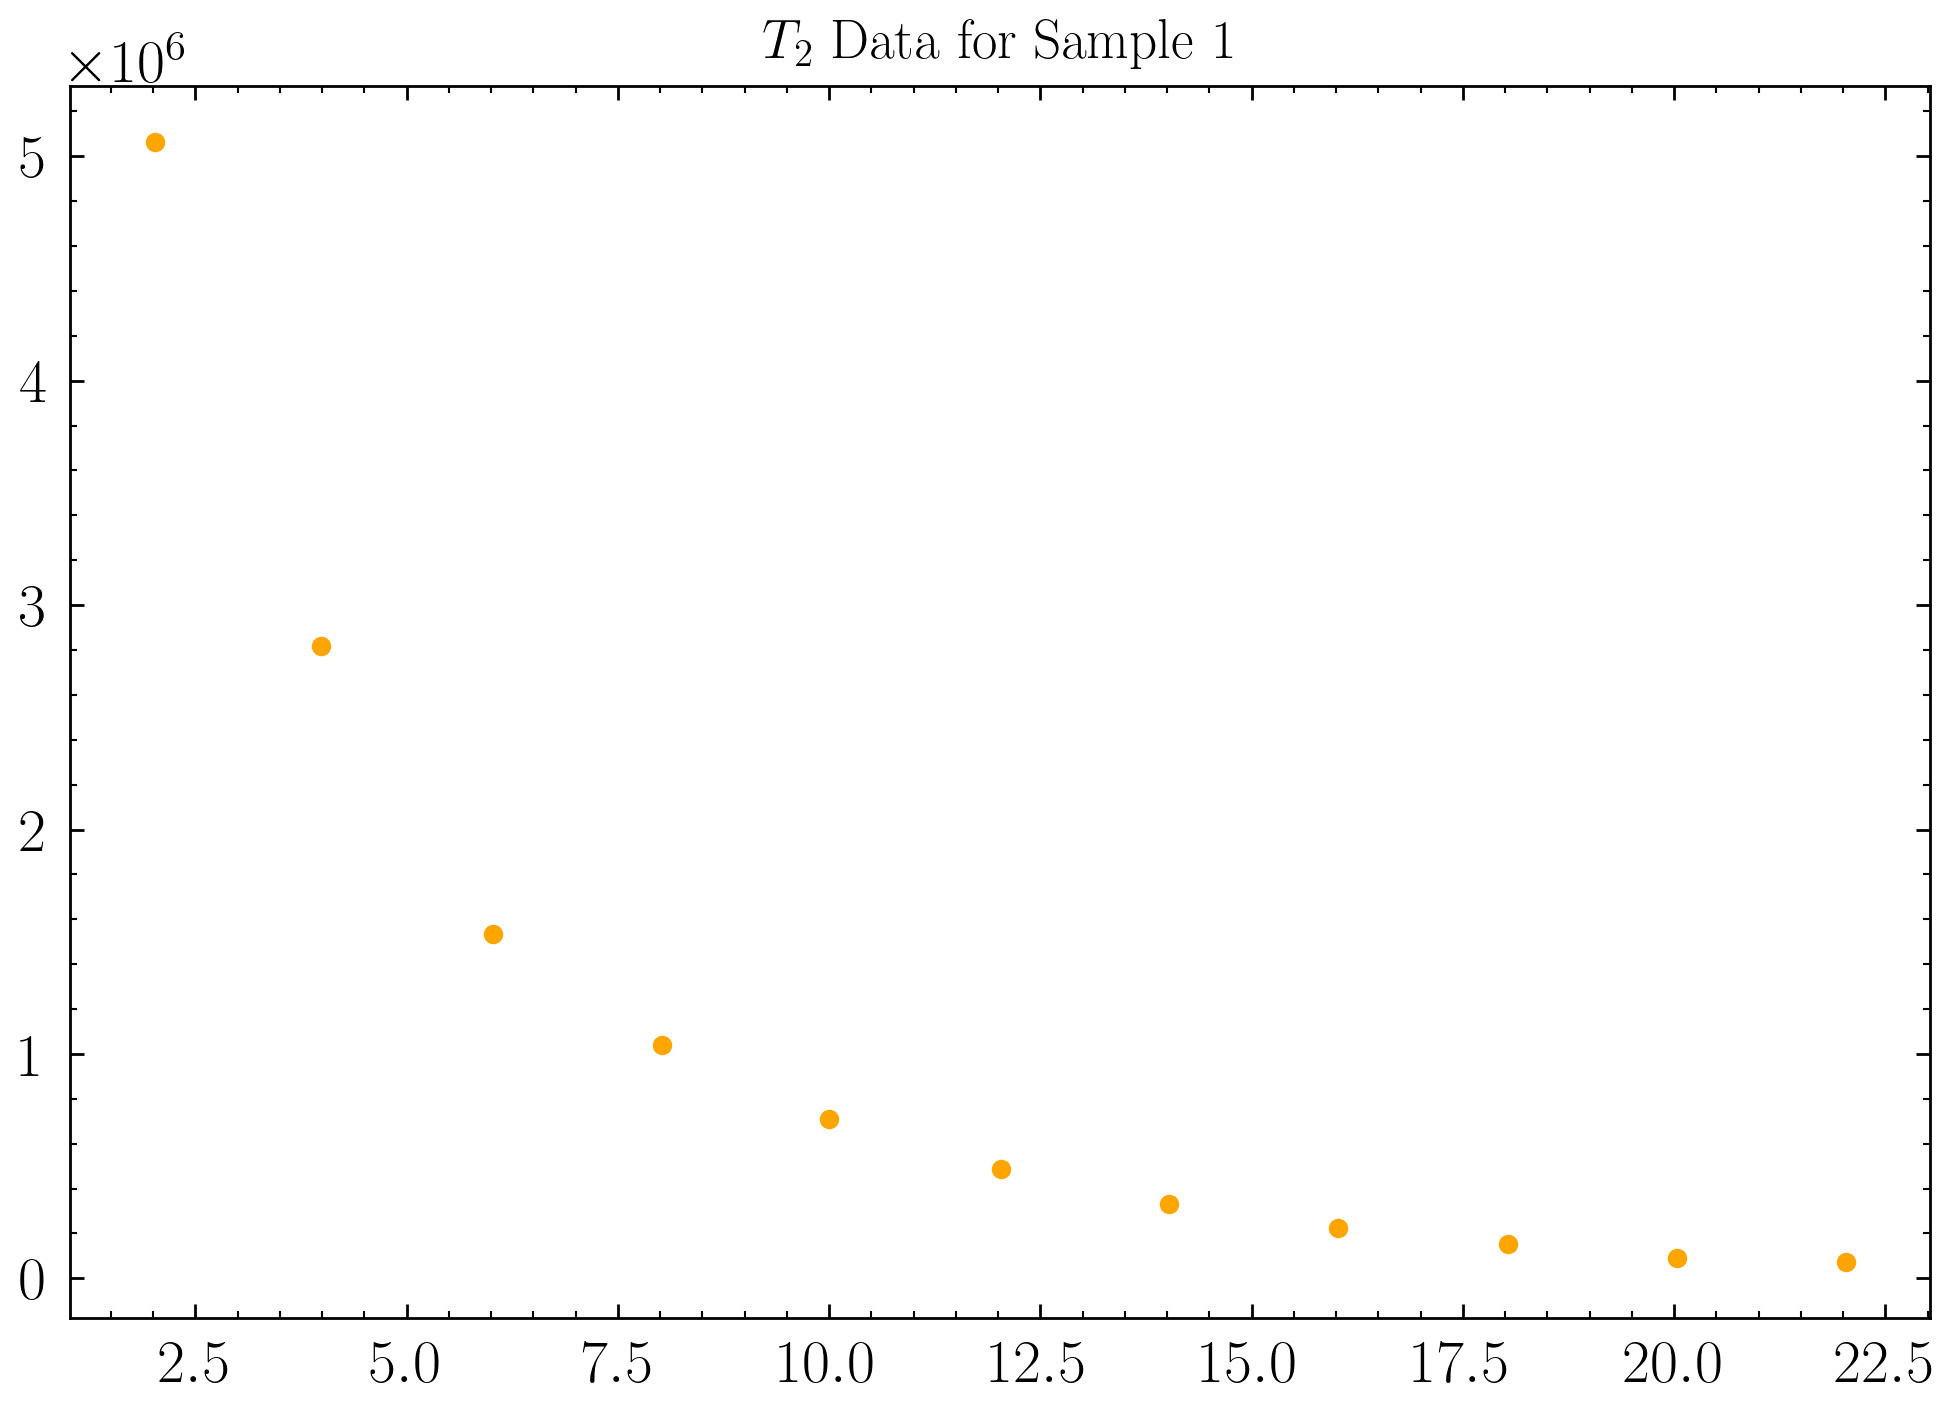

In [8]:
plt.scatter(t2_data['Time'], t2_data['Spin Echo Peak'], color='orange')
plt.title("$T_2$ Data for Sample 1", fontsize = 20)

<h5>
b. Fitting data to theoretical curve and plotting the fit

Fitted: $M_0$=8865986.31, $T_2$=3.39 ms, b=140888.37


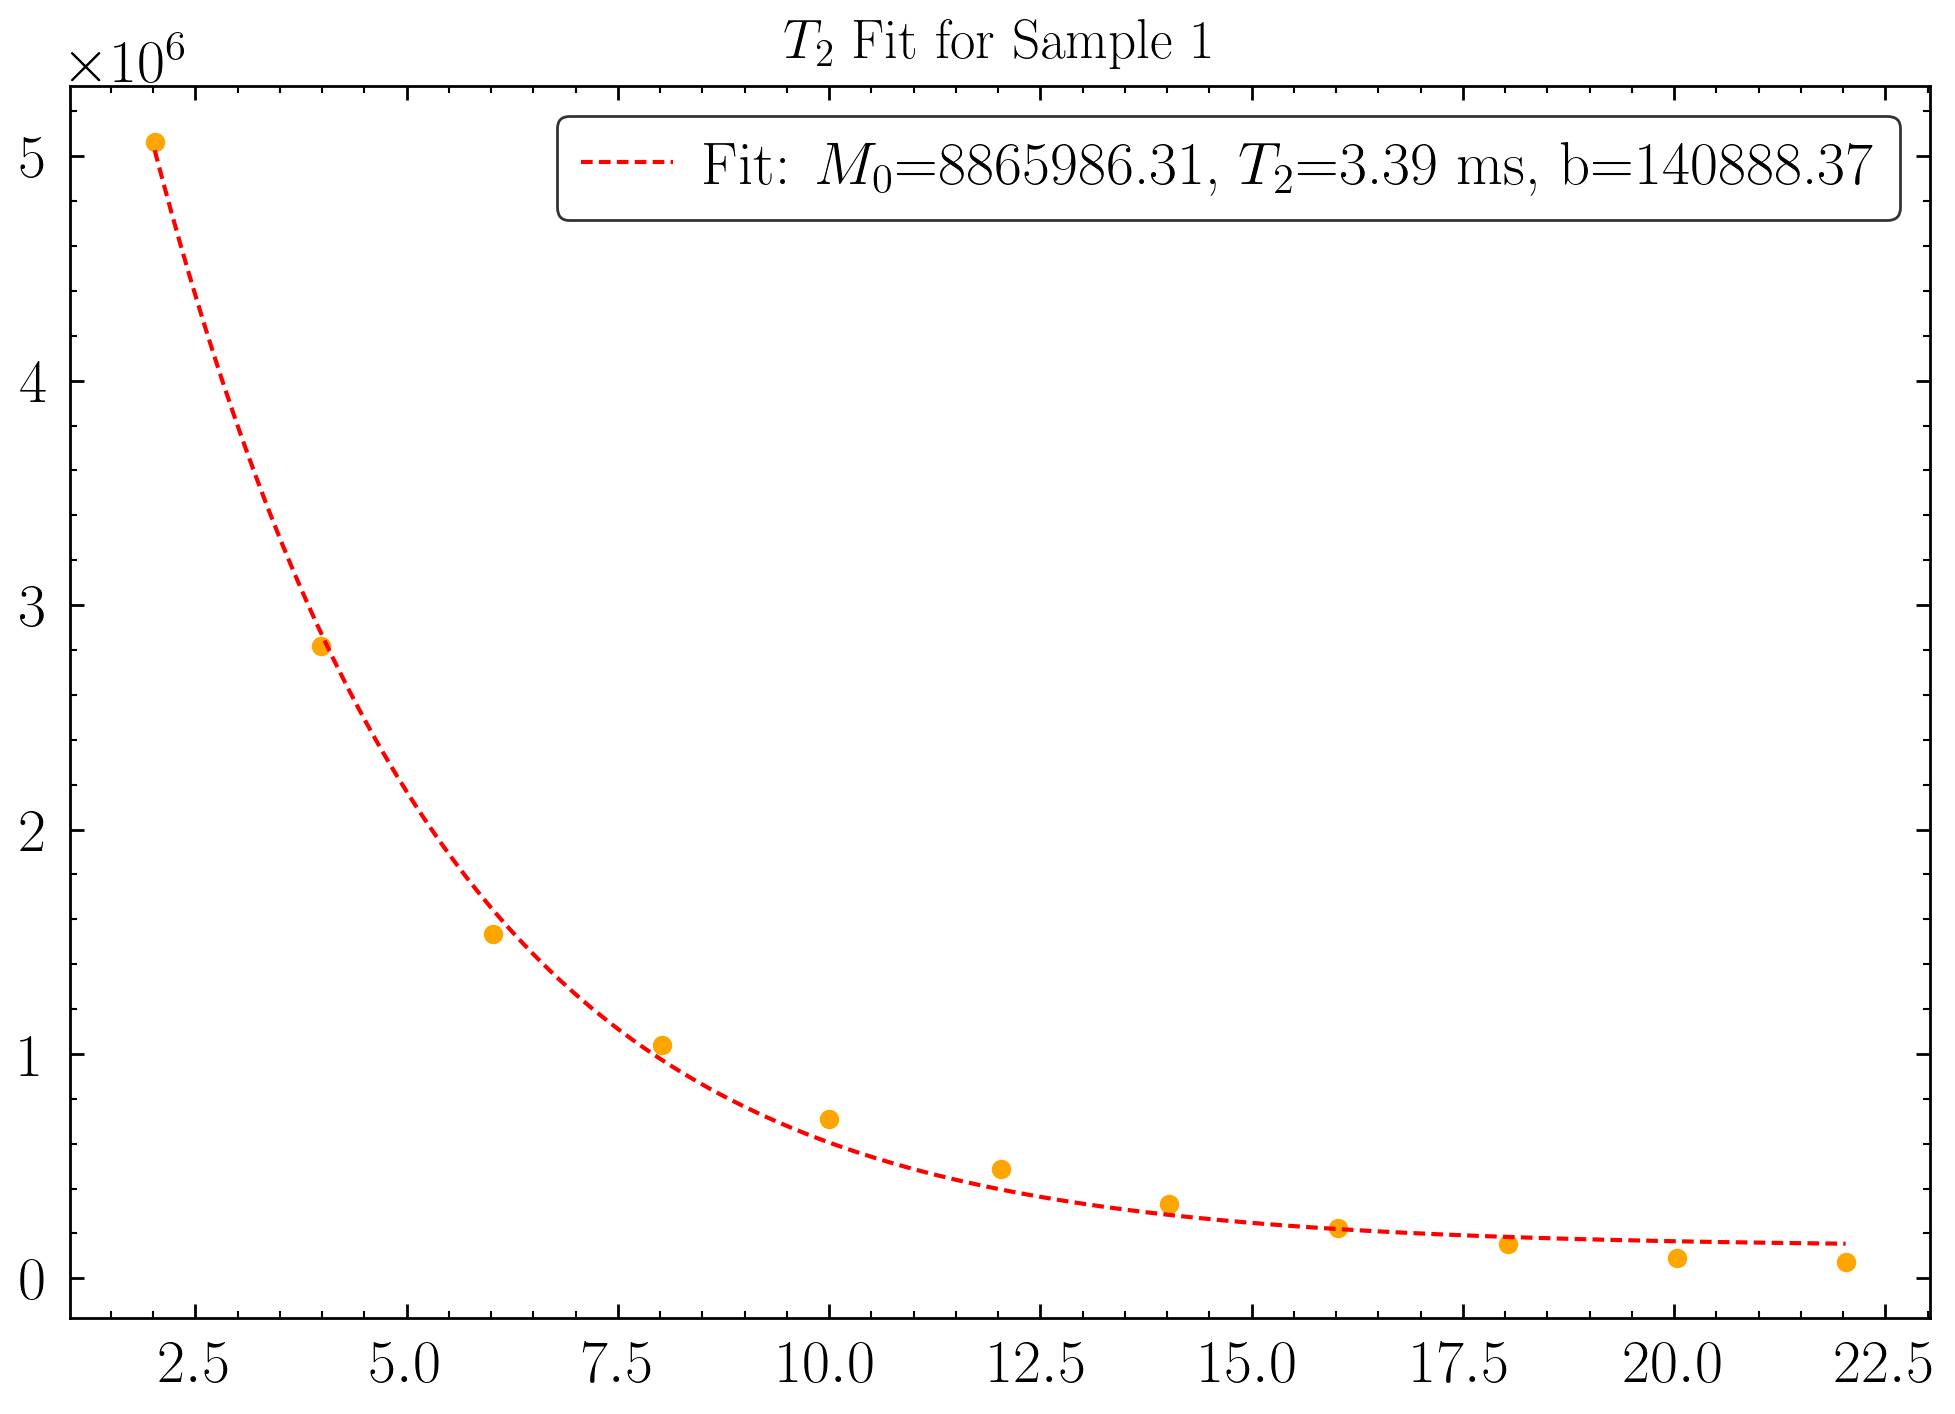

In [9]:
def fit_function_t2(t, M_0, T_2, b):
    return M_0 * np.exp(- t / T_2) + b  # no abs

popt, pcov = curve_fit(
    fit_function_t2, 
    t2_data['Time'],
    t2_data['Spin Echo Peak'],
    p0=[max(t2_data['Spin Echo Peak']), 100, min(t2_data['Spin Echo Peak'])]
)


ts = np.linspace(np.min(t2_data['Time']), np.max(t2_data['Time']), 1000)
plt.plot(
    ts, 
    fit_function_t2(ts, *popt), 
    'r--', 
    label=f"Fit: $M_0$={popt[0]:.2f}, $T_2$={popt[1]:.2f} ms, b={popt[2]:.2f}"
)
plt.scatter(t2_data['Time'], t2_data['Spin Echo Peak'], color='orange')
plt.title("$T_2$ Fit for Sample 1", fontsize=20)
plt.legend()

print(f"Fitted: $M_0$={popt[0]:.2f}, $T_2$={popt[1]:.2f} ms, b={popt[2]:.2f}")